<h2>Workshop 3 - Sentiment Analysis on IMDB Movie Reviews</h2>

Name: Jaime Pantoja

Student #: 2436040

Date: June 12, 2024

<h2>Data Collection</h2>



In [1]:
# Import the libraries 

import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
import csv
import warnings
warnings.filterwarnings('ignore')
time.sleep(2)
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
urls = []

# Movies URL's

url1 = 'https://www.imdb.com/title/tt0103064/reviews/?ref_=tt_ov_rt'
url2 = 'https://www.imdb.com/title/tt0816692/reviews/?ref_=tt_ov_rt'
url3 = 'https://www.imdb.com/title/tt0120815/reviews/?ref_=tt_ov_rt'
url4 = 'https://www.imdb.com/title/tt0089280/reviews/?ref_=tt_ov_rt'
url5 = 'https://www.imdb.com/title/tt0060666/reviews/?ref_=tt_ov_rt'

# Add movies to the urls list

urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)


In [3]:
content = []

for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_='review-container'))

In [4]:
print(content)

[[<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>10</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw2119628/"> Note to Hollywood: This is how you make an action film.
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur2326544/">TOMASBBloodhound</a></span><span class="review-date">30 August 2009</span>
</div>
<div class="content">
<div class="text show-more__control">And yes, I'd consider this more of an action film than Sci/fi since it takes place in contemporary times and locations. Nowaday

In [5]:
# Define a DataFrame 'movie' to store the reviews and ratings

movie = pd.DataFrame(columns=['Review', 'Rating'])

In [6]:
review = []
rating = []
count = 0

for cc in content:
    for c in cc:
        count += 1
        print('\nMovie review ', count)
        
        # Get review.
        str_list = c.find_all('a', attrs={'class': 'title'})
        rReview = ''
        for s in str_list:
            rReview = s.get_text()
        
        # Get rating.
        ratings = c.find_all('span', attrs={'class': ''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
        val = rVal[0]
        if len(val) > 2:
            continue
        else:
            review.append(rReview)
            rating.append(val)
        
        print('Review: ', rReview)
        print('Rating: ', val)

movie['Review'] = review
movie['Rating'] = rating



Movie review  1
Review:   Note to Hollywood: This is how you make an action film.

Rating:  10

Movie review  2
Review:   Movie that everyone should see!

Rating:  10

Movie review  3
Review:   A piece of cinematic genius...

Rating:  10

Movie review  4
Review:   This Terminator Sequel, may prove to be the best sequel ever made.

Rating:  10

Movie review  5
Review:   This is the sequel that dreams are made of.

Rating:  10

Movie review  6
Review:   Words cannot describe the greatness of this movie

Rating:  10

Movie review  7

Movie review  8
Review:   the best action film of all time, and NOT due to the CGI

Rating:  10

Movie review  9
Review:   The best action sequel of all time and one of the best Schwarzenegger's movies my personal favorite

Rating:  10

Movie review  10
Review:   Schwarzenegger's Best Film, Hands Down

Rating:  10

Movie review  11
Review:   Preferred the 1st one then. Still prefer it now

Rating:  7

Movie review  12
Review:   Hasta la vista baby

Rating:  

In [7]:
movie.tail(10)

,Review,Rating
104,Total ineptitude in every way possible\n,1
105,Hands down the worst movie ever\n,1
106,Bad Movie Makes Good MST3K\n,1
107,I Survived Manos: The Hands of Fate.\n,1
108,Manos is Manless\n,1
109,"Hell is ""Manos: The Hands of Fate"" on an eter...",1
110,More deserving of a Zero rating if they had o...,1
111,Underrated little oddball gem\n,8
112,The best bad movie of all time\n,6
113,"Oh, man...\n",1


In [8]:
movie.shape

(114, 2)

In [9]:
# Export the movie DataFrame to a csv file

movie.to_csv('JaimePantoja-2436040.csv', index=False)

<h2>Text Processing and Analysis</h2>

In [10]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(114,)

In [12]:
# Preparing text for Wordcloud

text = []
for t in textFeatures:
    text.append(t)

all_text = ', '.join(t for t in text)
print(all_text)
print(len(all_text))


 Note to Hollywood: This is how you make an action film.
,  Movie that everyone should see!
,  A piece of cinematic genius...
,  This Terminator Sequel, may prove to be the best sequel ever made.
,  This is the sequel that dreams are made of.
,  Words cannot describe the greatness of this movie
,  the best action film of all time, and NOT due to the CGI
,  The best action sequel of all time and one of the best Schwarzenegger's movies my personal favorite
,  Schwarzenegger's Best Film, Hands Down
,  Preferred the 1st one then. Still prefer it now
,  Hasta la vista baby
,  One Of The Better Sequels
,  Terminator 2: Cashing In
,  Best action film ever!!!
,  He Said He'd Be Back...and He Certainly is!
,  One sequel that out does the original
,  Awesome action sequences, terrific sound effects n superb cgi. The chase sequence is awesome.
,  surpasses the original
,  A bigger, richer sequel that is every bit as fantastic as its predecessor and even surpasses it in some areas
,  The "Empire S

In [13]:
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


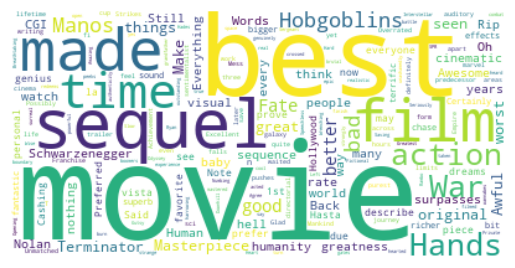

In [14]:
# Create stopword list

stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats", "the", "scene", "scenes", "shots", "one"])  # Custom stopwords added

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)

# Display the image

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the generated image to a file
wordcloud.to_file("wordcloud_cb_all.png")


<h2>Sentiment Indentification using VADER</h2>

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Create SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
sid = SentimentIntensityAnalyzer()

c = 0
for t in text:
    c += 1
    print(c, t)
    
    ss = sid.polarity_scores(t)
    print(ss)
    
    if ss['compound'] >= 0.05:
        print('positive')
    elif ss['compound'] <= -0.05:
        print('negative')
    else:
        print('neutral')
    
    print('\n')


1  Note to Hollywood: This is how you make an action film.

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


2  Movie that everyone should see!

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


3  A piece of cinematic genius...

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


4  This Terminator Sequel, may prove to be the best sequel ever made.

{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.6369}
positive


5  This is the sequel that dreams are made of.

{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
positive


6  Words cannot describe the greatness of this movie

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


7  the best action film of all time, and NOT due to the CGI

{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.6369}
positive


8  The best action sequel of all time and one of the best Schwarzenegger's movies my personal favorite

{'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'compound': 0.9081

In [17]:
print(movie.dtypes)

Review    object
Rating    object
dtype: object


In [18]:
# Here the idea is to create a truth value in the dataset based on the rating
# Then using the VADER sentiment analyser create a column that gives a final result that 
# can be comparable with the trught values and finally create a confusion matrix.

movie_dataset = movie.copy()
movie_dataset['Rating'] = movie_dataset['Rating'].astype(int)
movie_dataset['Truth'] = movie_dataset['Rating'].apply(lambda x: 1 if x > 5 else (-1 if x < 5 else 0) )
movie_dataset['Truth'] = movie_dataset['Truth'].astype(int)

# Initialize the VADER sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get the sentiment score and added to the DataFrame



def get_sentiment_label(review):
    score = analyzer.polarity_scores(review)
    compound = score['compound']
    if compound >= 0.05:
        return 1  # Positive
    elif compound < -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral


# Apply VADER sentiment analysis to each review

movie_dataset['VADER_Sentiment'] = movie_dataset['Review'].apply(get_sentiment_label)

# Generate confusion Matrix and Metrics: Compare the predicted label with the truth value

conf_matrix = confusion_matrix(movie_dataset['Truth'], movie_dataset['VADER_Sentiment'])

# Generate classification report
class_report = classification_report(movie_dataset['Truth'], movie_dataset['VADER_Sentiment'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

print(movie_dataset['VADER_Sentiment'].value_counts())




Confusion Matrix:
[[13 19 10]
 [ 1  1  0]
 [12 22 36]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.31      0.38        42
           0       0.02      0.50      0.05         2
           1       0.78      0.51      0.62        70

    accuracy                           0.44       114
   macro avg       0.44      0.44      0.35       114
weighted avg       0.67      0.44      0.52       114

 1    46
 0    42
-1    26
Name: VADER_Sentiment, dtype: int64


In [19]:
# Example of some misclassified instances.

filtered_df = movie_dataset[(movie_dataset['Truth'] == 1) & (movie_dataset['VADER_Sentiment'] == 0)]
print(filtered_df.loc[[10, 23], ['Review', 'Truth', 'VADER_Sentiment']])

                                   Review  Truth  VADER_Sentiment
10                  Hasta la vista baby\n      1                0
23   I waited 5 years to watch it again\n      1                0


<h2>Sentiment Classification using Machine Learning</h2>

Prepate 'Truth Set'

We will be using 'User Rating' as a truth set to evaluate the results. To prepare 'Truth Set', we'll define three classes - 'positive', 'negative', and 'neutral'. On the scale of 0 to 10, consider a review being positive if the rating is from 6 to 10, negative if the rating is from 0 to 4, and neutral if the rating is 5. We add this information in a new column called 'class-label'.




In [20]:
label = []
for r in movie['Rating']:
    r = int(r)
    if r > 5:
        label.append('1')  # Positive
    elif r < 5:
        label.append('-1')  # Negative
    elif r == 5:
        label.append('0')  # Neutral

movie['class-label'] = label


In [21]:
movie['class-label'].value_counts()

movie[['class-label','Rating', 'Review']].head()

movie['class-label'].value_counts()


1     70
-1    42
0      2
Name: class-label, dtype: int64

In this workshop, we'll work on binary classification, where only two classes are considered 'positive (1)' and'negative (-1)'. Ignore 'neutral (0)' class. However, the code in this notebook is adopted for multiclassclassification problem. You can try all the three classes for fun.

In [22]:
movie = movie[movie['class-label']!='0']
movie['class-label'].value_counts()

1     70
-1    42
Name: class-label, dtype: int64

In [23]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(112,)

In [24]:
import nltk

nltk.download('punkt')

from textblob import TextBlob


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
from textblob import TextBlob

def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words


In [26]:
# Example

print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

#Textblob convert a given sentence in to tokens or words

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The above Toy example demonstrates that TextBlob() function has converted given sentence in to tokens orwords, converted upper case letters to lower case, removed wild characters.


Transforming text dataset in to two matrix representations.

In [27]:

# CountVectorizer: Converts each review into a vector based on the word count.
countvectorizer = CountVectorizer(
    analyzer='word',
    stop_words='english',
    tokenizer=textblob_tokenizer
)

# TfidfVectorizer: Converts text into a vector based on tf-idf weighting scheme.
tfidfvectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    tokenizer=textblob_tokenizer
)


In [28]:
textFeatures

0       Note to Hollywood: This is how you make an ac...
1                      Movie that everyone should see!\n
2                       A piece of cinematic genius...\n
3       This Terminator Sequel, may prove to be the b...
4          This is the sequel that dreams are made of.\n
                             ...                        
109     Hell is "Manos: The Hands of Fate" on an eter...
110     More deserving of a Zero rating if they had o...
111                      Underrated little oddball gem\n
112                     The best bad movie of all time\n
113                                         Oh, man...\n
Name: Review, Length: 112, dtype: object

In [29]:
# Convert text features into vectors using CountVectorizer
count_matrix = countvectorizer.fit_transform(textFeatures)

# Convert text features into vectors using TfidfVectorizer
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)


In [30]:
print(tfidf_matrix) #print elements of the matrix

  (0, 93)	0.34315235369608665
  (0, 16)	0.36758157458071683
  (0, 146)	0.4219794767923642
  (0, 247)	0.30020364608179806
  (0, 124)	0.48935740529128297
  (0, 168)	0.48935740529128297
  (1, 79)	0.8978131170608185
  (1, 162)	0.4403766647241165
  (2, 102)	0.5928270764039159
  (2, 52)	0.5450799161267744
  (2, 184)	0.5928270764039159
  (3, 34)	0.27567313873671645
  (3, 193)	0.46967826663144835
  (3, 218)	0.6587054816450354
  (3, 245)	0.4318496917094383
  (3, 247)	0.28813118306488483
  (4, 71)	0.7316513417684045
  (4, 218)	0.5130562596948612
  (4, 247)	0.44884249851859215
  (5, 107)	0.44592670322012423
  (5, 62)	0.5704050615658967
  (5, 274)	0.524463803176202
  (5, 162)	0.2797832575408095
  (5, 247)	0.34992354744007176
  (6, 47)	0.5523553708943542
  :	:
  (105, 89)	0.48905445101566536
  (105, 151)	0.4490944591002897
  (105, 114)	0.4490944591002897
  (106, 150)	0.7995578313258568
  (106, 151)	0.6005891060995802
  (107, 144)	0.46409003251981307
  (107, 77)	0.46409003251981307
  (107, 89)	0.379

In [31]:
print(tfidf_matrix.shape)
print(count_matrix.shape)

(112, 283)
(112, 283)


Above numbers show dimension of count_matrix, there are X rows (112 reviews), and Y columns (280 word-features) in the transformed dataset.



<h3>Build ML models</h3>

In [32]:
# Splitting the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_matrix,
    movie['class-label'],
    test_size=0.3,
    random_state=8
)

# Printing the shapes of the training and testing sets
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)


(78, 283) (34, 283) (78,) (34,)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# SVM classifier
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test, prediction)
print('Accuracy:', acc)

prec = precision_score(labels_test, prediction, average='weighted')
print('Precision:', prec)

recall = recall_score(labels_test, prediction, average='weighted')
print('Recall:', recall)

f1 = f1_score(labels_test, prediction, average='weighted')
print('F-1 measure: ', f1)

print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))
print("\nClassification Report:")
print(classification_report(labels_test, prediction))



Evaluation for SVM 

Accuracy: 0.6176470588235294
Precision: 0.5896493212669683
Recall: 0.6176470588235294
F-1 measure:  0.5991659821823466

Confusion Matrix:

[[ 3  8]
 [ 5 18]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.38      0.27      0.32        11
           1       0.69      0.78      0.73        23

    accuracy                           0.62        34
   macro avg       0.53      0.53      0.53        34
weighted avg       0.59      0.62      0.60        34



**Report**

Write a summary on the evaluation performed and the interpretation of the results.

End of the Workshop 3